# REDPy EQ Rate Plot

In [1]:
import redpy.config
import redpy.table
import redpy.plotting
#import numpy as np


In [2]:
from tables import *
import numpy as np
import matplotlib
import datetime
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates
import time
import pandas as pd
import redpy.cluster
import redpy.correlation
from redpy.optics import *
import os
import shutil
import glob
import urllib
from obspy import UTCDateTime
from obspy.geodetics import locations2degrees
from obspy.taup import TauPyModel
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.transforms import offset_copy
from bokeh.plotting import figure, output_file, save, gridplot
from bokeh.models import HoverTool, ColumnDataSource, OpenURL, TapTool, Range1d, Div, Span
from bokeh.models import Arrow, VeeHead, ColorBar, LogColorMapper, LogTicker, LabelSet
from bokeh.models.glyphs import Line, Quad
from bokeh.layouts import column
from bokeh.palettes import inferno, all_palettes
import urllib.request

In [3]:
config = '/Users/jjw2/Development/REDPy_svgfigures/agung_grlB2.cfg'
opt = redpy.config.Options(config)
h5file, rtable, otable, ttable, ctable, jtable, dtable, ftable = redpy.table.openTable(opt)


In [4]:
dt = rtable.cols.startTimeMPL[:]
fi = np.nanmean(rtable.cols.FI[:], axis=1)
longevity = ftable.cols.longevity[:]
famstarts = ftable.cols.startTime[:]
alltrigs = ttable.cols.startTimeMPL[:]
    
# Read in annotation file (if it exists)
if opt.anotfile != '':
    df = pd.read_csv(opt.anotfile)
    
# Create histogram of events/dybin
histT, hT = np.histogram(alltrigs, bins=np.arange(min(alltrigs),
    max(alltrigs+opt.dybin), opt.dybin))
histR, hR = np.histogram(dt, bins=np.arange(min(alltrigs),
    max(alltrigs+opt.dybin), opt.dybin))
        
# Determine padding for hover bars (~1% of window range on each side)
barpad = (max(alltrigs)-min(alltrigs))*0.01
barpadr = opt.recplot*0.01
        
# Create histogram of events/hrbin
histTr, hTr = np.histogram(alltrigs, bins=np.arange(max(alltrigs)-opt.recplot,
    max(alltrigs+opt.hrbin/24), opt.hrbin/24))
histRr, hRr = np.histogram(dt, bins=np.arange(max(alltrigs)-opt.recplot,
    max(alltrigs+opt.hrbin/24), opt.hrbin/24))

## bokeh EQ rate

In [5]:
oTOOLS = ['pan,box_zoom,reset,save,tap']
    
if opt.dybin>=1:
    o0title = 'Repeaters vs. Orphans by {:.1f} Day Bin'.format(opt.dybin)
else:
    o0title = 'Repeaters vs. Orphans by {:.1f} Hour Bin'.format(opt.dybin*24)
    
o0 = figure(tools=oTOOLS, plot_width=1250, plot_height=250, x_axis_type='datetime',
    title=o0title)
o0.grid.grid_line_alpha = 0.3
o0.xaxis.axis_label = 'Date'
o0.yaxis.axis_label = 'Events'

o0 = figure(tools=oTOOLS, plot_width=1250, plot_height=250, x_axis_type='datetime',
    title=o0title)
o0.grid.grid_line_alpha = 0.3
o0.xaxis.axis_label = 'Date'
o0.yaxis.axis_label = 'Events'
    
if opt.anotfile != '':
    for row in df.itertuples():
        spantime = (datetime.datetime.strptime(row[1]
            ,'%Y-%m-%dT%H:%M:%S')-datetime.datetime(1970, 1, 1)).total_seconds()
        o0.add_layout(Span(location=spantime*1000, dimension='height',
            line_color=row[2], line_width=row[3], line_dash=row[4],
            line_alpha=row[5]))
    
o0.line(matplotlib.dates.num2date(hT[0:-1]+opt.dybin/2), histT-histR, color='black',
    legend='Orphans')
o0.line(matplotlib.dates.num2date(hR[0:-1]+opt.dybin/2), histR, color='red',
    legend='Repeaters', line_width=2)
o0.legend.location = 'top_left'


In [6]:
#from bokeh.io import show
#show(o0)

## matplotlib EQ rates

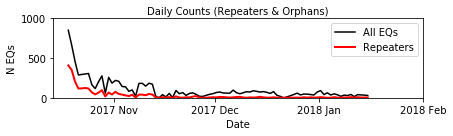

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np
import matplotlib.dates as mdates


fig = plt.figure(figsize=[6.4,2], tight_layout=True)
ax = fig.add_subplot(1,1,1)
ax.plot(matplotlib.dates.num2date(hT[0:-1]+opt.dybin/2), histT, color='black', label='All EQs')
#ax.plot(matplotlib.dates.num2date(hT[0:-1]+opt.dybin/2), histT-histR, color='black', label='Orphans')
ax.plot(matplotlib.dates.num2date(hR[0:-1]+opt.dybin/2), histR, color='red', linewidth=2, label='Repeaters')
plt.xlabel('Date', fontname='Times', fontsize=10)
plt.ylabel('N EQs', fontname='Times', fontsize=10)
plt.title('Daily Counts (Repeaters & Orphans)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
# ax.xaxis.label.set_size(28)
plt.yticks([0,500,1000])
ax.set_ylim([0,1000])
ax.legend()

import pandas as pd
drng = pd.date_range(start='2017/11/1', end='2018/2/1', freq='MS')
xticks = drng.to_pydatetime()
xtick_labels = list(drng.strftime('%Y %b'))
plt.xticks(xticks, xtick_labels)

fig.show()

In [21]:
fig.savefig('/Users/jjw2/Desktop/TestFigure.png', dpi=450, facecolor=None, edgecolor=None,
        orientation='portrait', papertype=None,
        transparent=True, bbox_inches=None, pad_inches=0,
        frameon=None, metadata=None)